In [10]:
# Importing pandas library to interpret and manipulate the data
import pandas as pd

In [12]:
# Loading the public transport dataset
df = pd.read_csv(r'D:\Downloads\Daily_Public_Transport_Dataset.csv')

In [64]:
# Preview the dataset - 5 rows
df.head()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Date,,,,,,
2019-07-01,15987,9962,407,21223,3715,0.0
2019-07-02,16895,10656,409,21715,3993,0.0
2019-07-03,16613,10658,427,22025,3638,0.0
2019-07-04,16604,10445,437,21868,3576,0.0
2019-07-05,16040,10532,400,20697,2856,0.0


In [66]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1918 entries, 2019-07-01 to 2024-09-29
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Local Route   1918 non-null   int64  
 1   Light Rail    1918 non-null   int64  
 2   Peak Service  1918 non-null   int64  
 3   Rapid Route   1918 non-null   int64  
 4   School        1918 non-null   int64  
 5   Other         1918 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 104.9 KB


In [68]:
# Checking for null values
df.isnull().sum()

Local Route     0
Light Rail      0
Peak Service    0
Rapid Route     0
School          0
Other           0
dtype: int64

In [26]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1918 entries, 2019-07-01 to 2024-09-29
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Local Route   1918 non-null   int64  
 1   Light Rail    1918 non-null   int64  
 2   Peak Service  1918 non-null   int64  
 3   Rapid Route   1918 non-null   int64  
 4   School        1918 non-null   int64  
 5   Other         1918 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 104.9 KB


In [36]:
# Fill missing values in with 0
df['Other'] = df['Other'].fillna(0)

In [72]:
df.isnull().sum()

Local Route     0
Light Rail      0
Peak Service    0
Rapid Route     0
School          0
Other           0
dtype: int64

In [40]:
# Set Date as index for time series analysis
df.set_index('Date', inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1918 entries, 2024-08-30 to 2023-07-26
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Local Route   1918 non-null   int64  
 1   Light Rail    1918 non-null   int64  
 2   Peak Service  1918 non-null   int64  
 3   Rapid Route   1918 non-null   int64  
 4   School        1918 non-null   int64  
 5   Other         1918 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 104.9 KB


In [74]:
# Sort the dataframe by Date --> to sort the data by date
df.sort_index(inplace=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1918 entries, 2019-07-01 to 2024-09-29
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Local Route   1918 non-null   int64  
 1   Light Rail    1918 non-null   int64  
 2   Peak Service  1918 non-null   int64  
 3   Rapid Route   1918 non-null   int64  
 4   School        1918 non-null   int64  
 5   Other         1918 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 104.9 KB


In [78]:
df.head()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Date,,,,,,
2019-07-01,15987,9962,407,21223,3715,0.0
2019-07-02,16895,10656,409,21715,3993,0.0
2019-07-03,16613,10658,427,22025,3638,0.0
2019-07-04,16604,10445,437,21868,3576,0.0
2019-07-05,16040,10532,400,20697,2856,0.0


In [80]:
df.describe()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,42.937956
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.761911
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,39.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,67.750000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


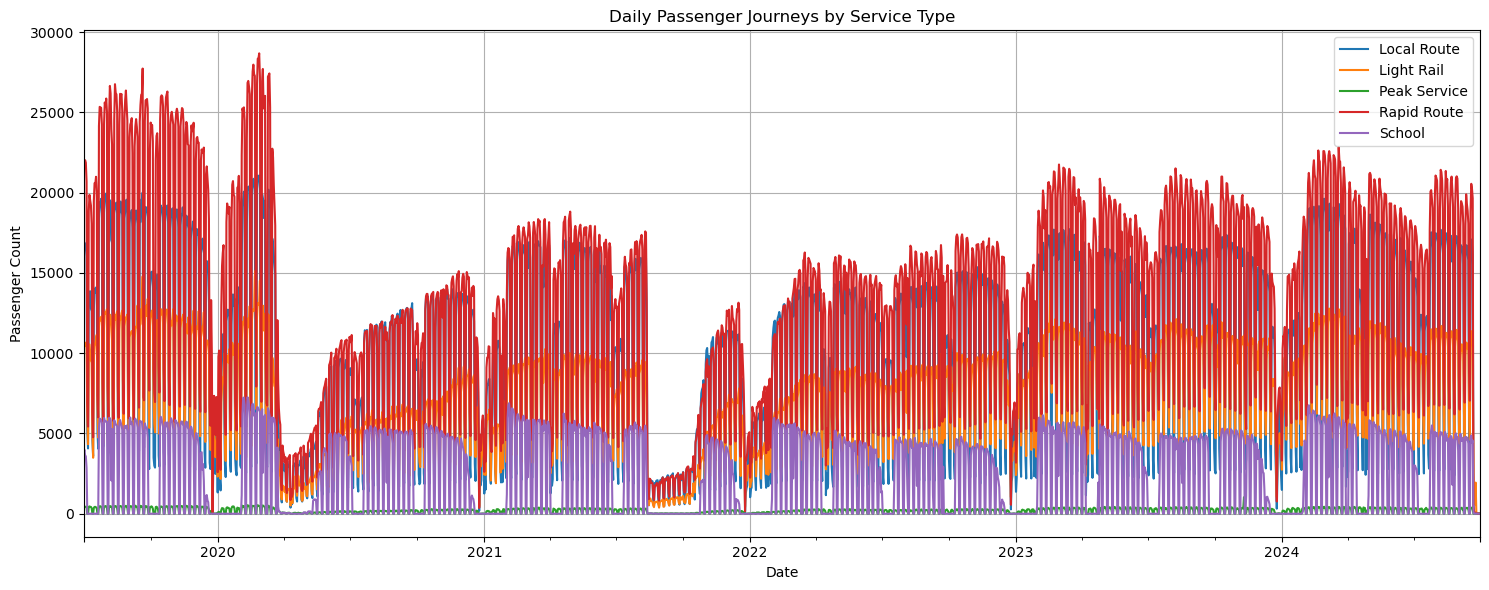

In [82]:
import matplotlib.pyplot as plt

# Define the main service columns
cols = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']

# Plot daily trends
df[cols].plot(figsize=(15,6), title='Daily Passenger Journeys by Service Type')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.grid()
plt.tight_layout()
plt.show()

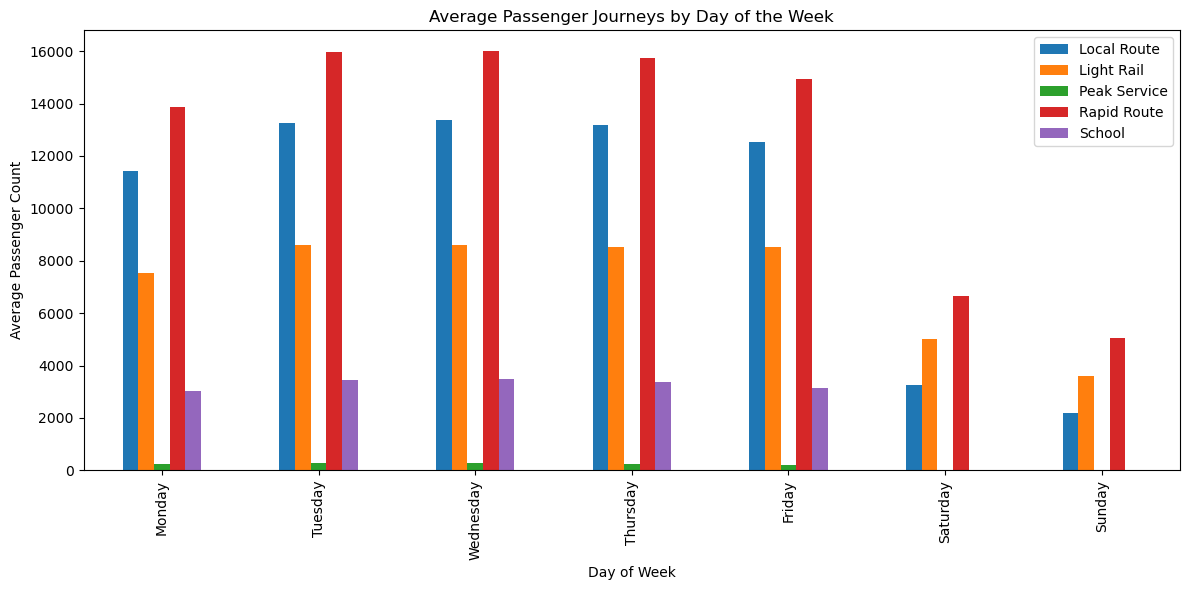

In [84]:
# Add a day-of-week column
df['Day of Week'] = df.index.day_name()

# Group by day of week and calculate mean for each service
weekly_avg = df.groupby('Day of Week')[cols].mean()

# Reorder to start from Monday
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_avg = weekly_avg.reindex(ordered_days)

# Plot
weekly_avg.plot(kind='bar', figsize=(12,6), title='Average Passenger Journeys by Day of the Week')
plt.ylabel('Average Passenger Count')
plt.tight_layout()
plt.show()

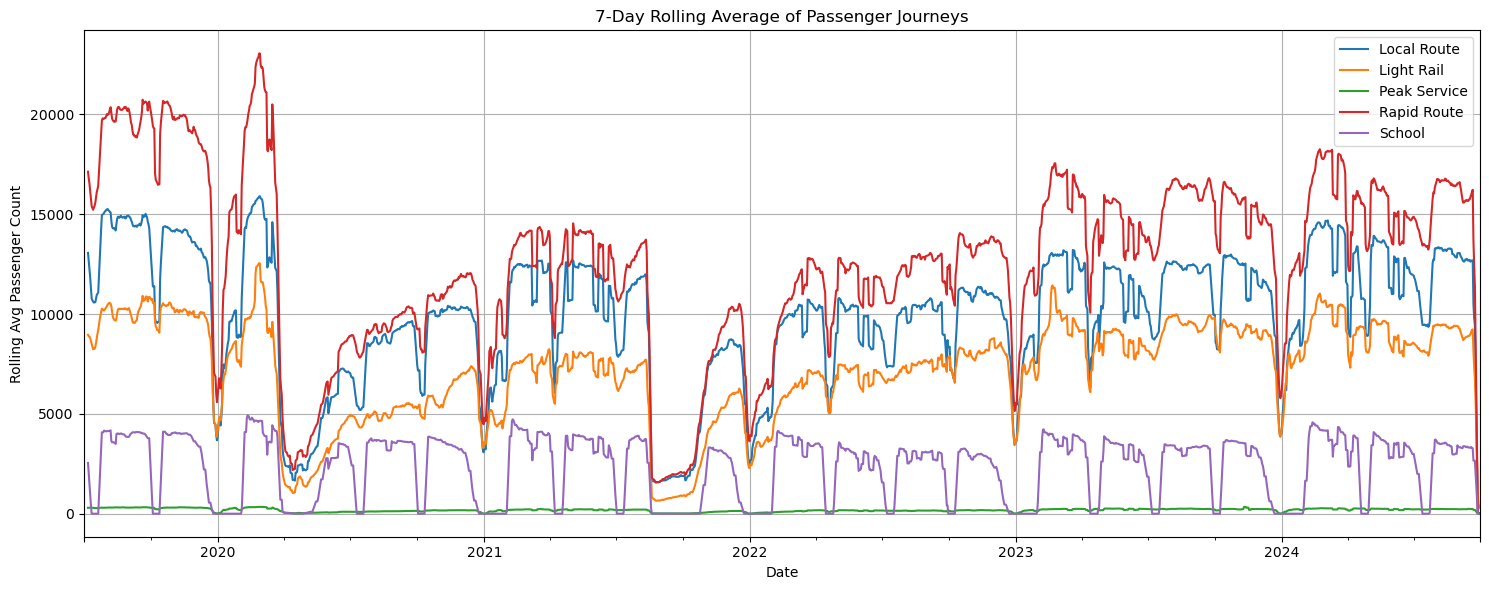

In [86]:
df_rolling = df[cols].rolling(window=7).mean()

# Plot rolling averages
df_rolling.plot(figsize=(15,6), title='7-Day Rolling Average of Passenger Journeys')
plt.xlabel('Date')
plt.ylabel('Rolling Avg Passenger Count')
plt.grid()
plt.tight_layout()
plt.show()

In [92]:
# Forecast the data for next 7 days
# Prophet forecast technique is being used
!pip install prophet

  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 1.7 MB/s eta 0:00:09
    --------------------------------------- 0.3/13.3 MB 2.8 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/13.3 MB 4.9 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/13.3 MB 4.6 MB/s eta 0:00:03
   --- ------------------------------------ 1.2/13.3 MB 5.0 MB/s eta 0:00:03
   ---- ----------------------------------- 1.5/13.3 MB 5.1 MB/s eta 0:00:03
   ----- ---------------------------------- 1.9/13.3 MB 5.7 MB/s eta 0:00:03
   ------ --------------------------------- 2.2/13.3 MB 5.6 MB/s eta 0:00:02
   ------ --------------------------------- 2.3/13.3 MB 5.6 MB/s eta 0:00:02
   -------- ------------------------------- 2.7/13.3 MB 5.7 MB/s eta 0:00:02
   -------- ------------------------------- 3.0/13.3 MB 5.8 MB/s eta 0:00:02
   ----

In [94]:
# Preparing Data for Prophet -> it needs dataframe with 2 columns
# ds -> the date column, y -> the numeric value you want to forecast

prepared_data = {}

services = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']

for service in services:
    temp_df = df[[service]].reset_index()
    temp_df.rename(columns={'Date': 'ds', service: 'y'}, inplace=True)
    prepared_data[service] = temp_df

In [96]:
prepared_data['Local Route']

,ds,y
0,2019-07-01,15987
1,2019-07-02,16895
2,2019-07-03,16613
3,2019-07-04,16604
4,2019-07-05,16040
...,...,...
1913,2024-09-25,21
1914,2024-09-26,9
1915,2024-09-27,6
1916,2024-09-28,1


In [98]:
prepared_data['Light Rail']

,ds,y
0,2019-07-01,9962
1,2019-07-02,10656
2,2019-07-03,10658
3,2019-07-04,10445
4,2019-07-05,10532
...,...,...
1913,2024-09-25,0
1914,2024-09-26,0
1915,2024-09-27,0
1916,2024-09-28,0


11:45:51 - cmdstanpy - INFO - Chain [1] start processing
11:45:51 - cmdstanpy - INFO - Chain [1] done processing


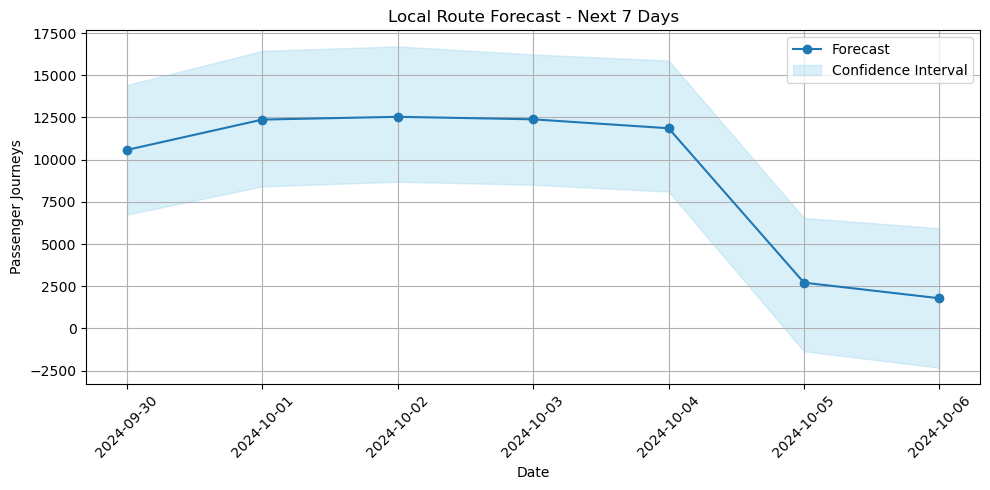

11:45:52 - cmdstanpy - INFO - Chain [1] start processing
11:45:52 - cmdstanpy - INFO - Chain [1] done processing


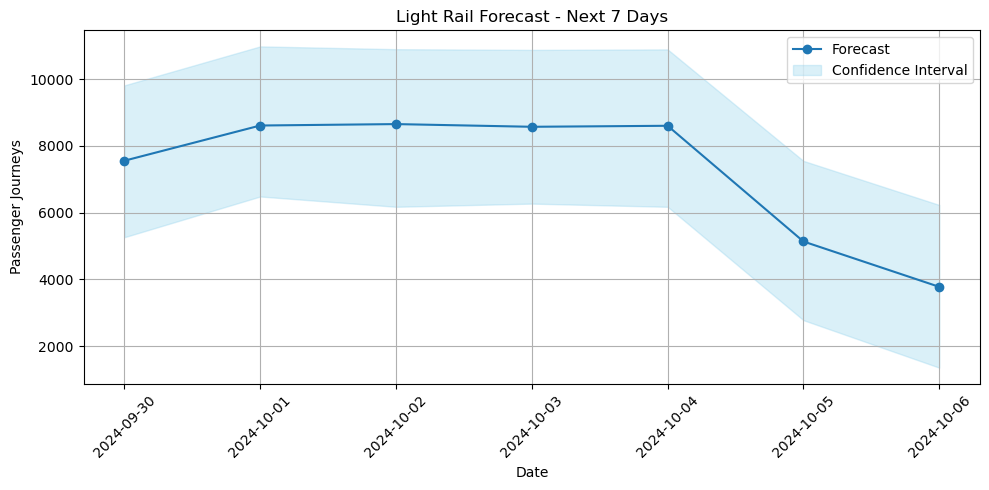

11:45:53 - cmdstanpy - INFO - Chain [1] start processing
11:45:53 - cmdstanpy - INFO - Chain [1] done processing


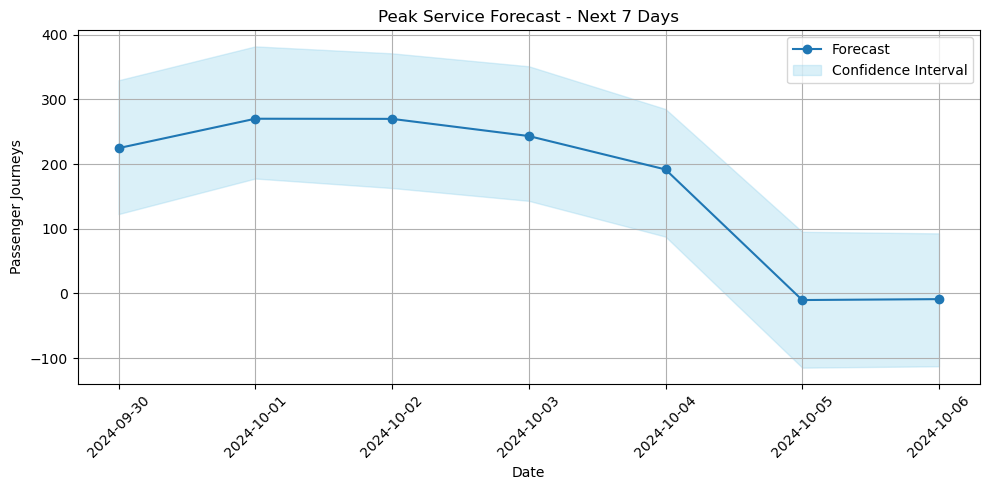

11:45:54 - cmdstanpy - INFO - Chain [1] start processing
11:45:54 - cmdstanpy - INFO - Chain [1] done processing


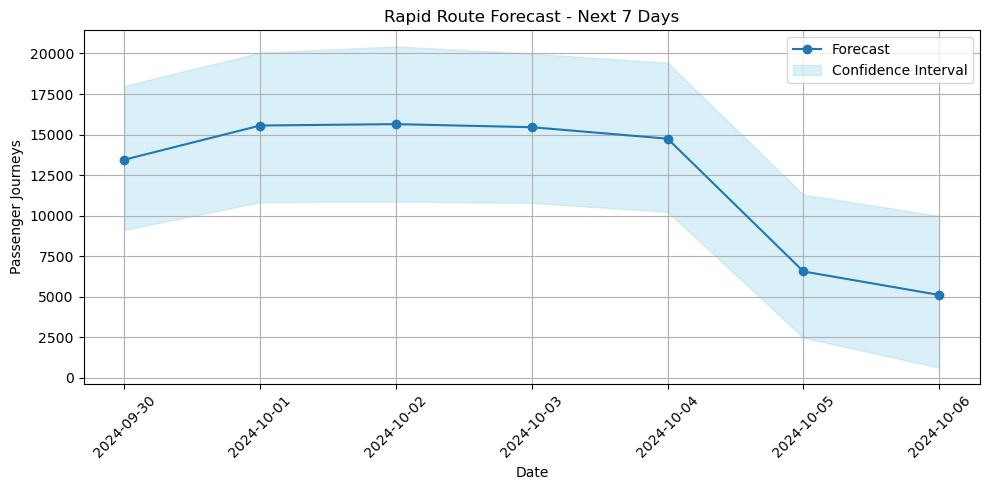

11:45:54 - cmdstanpy - INFO - Chain [1] start processing
11:45:54 - cmdstanpy - INFO - Chain [1] done processing


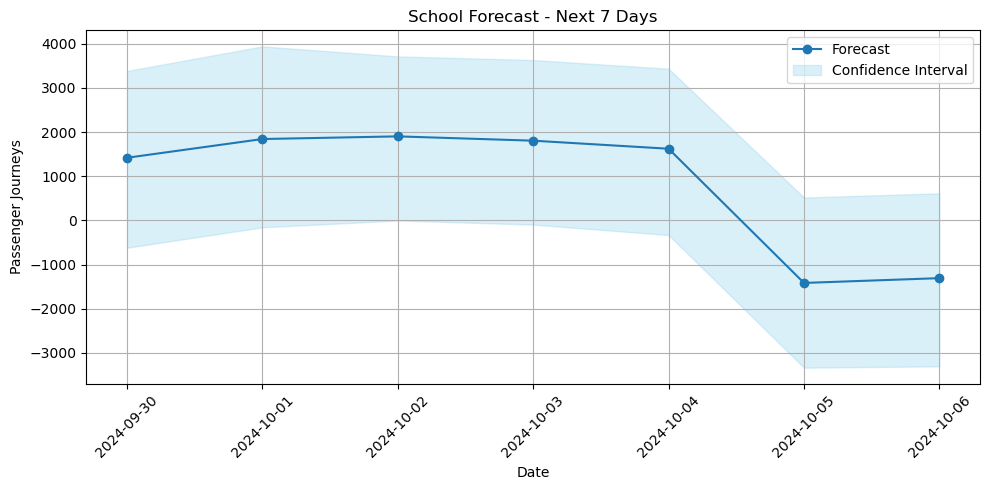

In [106]:
# Forecast the data for next 7 days visualised
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

forecast_days = 7  # Number of days to forecast

services = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']
forecast_results = {}

for service in services:
    # Prepare data
    df_prophet = df[[service]].reset_index().rename(columns={'Date': 'ds', service: 'y'})

    # Initialize and fit model
    model = Prophet(daily_seasonality=True)
    model.fit(df_prophet)

    # Create future dataframe
    future = model.make_future_dataframe(periods=forecast_days)

    # Forecast
    forecast = model.predict(future)

    # Filter only next 7 days forecast
    last_date = df_prophet['ds'].max()
    forecast_next_7 = forecast[forecast['ds'] > last_date].head(forecast_days)

    # Plot only next 7 days
    plt.figure(figsize=(10, 5))
    plt.plot(forecast_next_7['ds'], forecast_next_7['yhat'], label='Forecast', marker='o')
    plt.fill_between(forecast_next_7['ds'],
                     forecast_next_7['yhat_lower'],
                     forecast_next_7['yhat_upper'],
                     color='skyblue', alpha=0.3, label='Confidence Interval')
    plt.title(f'{service} Forecast - Next {forecast_days} Days')
    plt.xlabel('Date')
    plt.ylabel('Passenger Journeys')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Save the forecast results
    forecast_results[service] = forecast_next_7[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [110]:
for service in services:
    print(f"\nForecast for {service}:")
    print(forecast_results[service])
'''Note: ds - date
         y - target variable
         yhat - predicted value
         yhat_lower - lower confidence bound
         yhat_upper - upper confidence bound'''


Forecast for Local Route:
             ds          yhat   yhat_lower    yhat_upper
1918 2024-09-30  10579.922575  6747.803102  14424.374628
1919 2024-10-01  12375.776354  8417.630156  16446.370539
1920 2024-10-02  12540.870815  8694.587713  16711.456098
1921 2024-10-03  12391.129935  8515.360487  16233.049263
1922 2024-10-04  11862.335264  8108.815740  15871.975275
1923 2024-10-05   2715.001207 -1348.195262   6548.334869
1924 2024-10-06   1790.610792 -2320.537497   5940.319444

Forecast for Light Rail:
             ds         yhat   yhat_lower    yhat_upper
1918 2024-09-30  7555.557183  5265.182927   9811.297891
1919 2024-10-01  8609.471383  6484.859486  10977.868478
1920 2024-10-02  8652.099587  6176.485500  10894.182885
1921 2024-10-03  8571.437852  6271.694759  10873.414696
1922 2024-10-04  8601.483803  6176.018458  10887.683962
1923 2024-10-05  5137.582078  2782.243019   7550.550424
1924 2024-10-06  3780.016987  1360.788462   6231.999632

Forecast for Peak Service:
             ds

'Note: ds - date\n         y - target variable\n         yhat - predicted value\n         yhat_lower - lower confidence bound\n         yhat_upper - upper confidence bound'